In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
movies = pd.read_csv(r"//content//drive//MyDrive//Individual Project//IMDb movies.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [94]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [95]:
movies.shape

(85855, 22)

In [96]:
movies.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [97]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


Now we will drop the column original_title because that is a duplicate column of title.

In [98]:
movies = movies.drop('original_title', axis=1)

In [99]:
movies.describe(include='all')

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,85855,85855,85855,85855,85855,85855.000000,85791,85022,85768,84283,81400,85786,83740,85855.000000,8.585500e+04,23710,15326,31016,13305.000000,78258.000000,74058.000000
unique,85855,82094,168,22012,1257,NaN,4907,4377,34733,66859,32050,85729,83611,NaN,NaN,4642,14857,30414,NaN,NaN,NaN
top,tt1538988,Anna,2017,2010,Drama,NaN,USA,English,Jesús Franco,Jing Wong,Metro-Goldwyn-Mayer (MGM),"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",The story of,NaN,NaN,$ 1000000,$ 1000000,$ 8144,NaN,NaN,NaN
freq,1,10,3223,113,12543,NaN,28511,35939,87,84,1284,9,15,NaN,NaN,758,19,15,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,100.351418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.898656,9.493490e+03,NaN,NaN,NaN,55.896881,46.040826,27.479989
std,NaN,NaN,NaN,NaN,NaN,22.553848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.234987,5.357436e+04,NaN,NaN,NaN,17.784874,178.511411,58.339158
min,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.900000e+01,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200000,2.050000e+02,NaN,NaN,NaN,43.000000,4.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,4.840000e+02,NaN,NaN,NaN,57.000000,9.000000,8.000000
75%,NaN,NaN,NaN,NaN,NaN,108.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.800000,1.766500e+03,NaN,NaN,NaN,69.000000,27.000000,23.000000


# **Data Cleaning**

In [100]:
movies['year'].str.len()

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
85850    4.0
85851    4.0
85852    4.0
85853    4.0
85854    4.0
Name: year, Length: 85855, dtype: float64

In [101]:
movies[(movies['year'].str.len() >4)]

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
83917,tt8206668,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,"Mike Makowsky, Robert Kolker",HBO Films,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0


In [102]:
movies.loc[(movies.year == 'TV Movie 2019'),'year']='2019' ## Converting  the row value to 2019
movies.loc[(movies.date_published == 'TV Movie 2019'),'date_published']='2019'

In [103]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   year                   85855 non-null  object 
 3   date_published         85855 non-null  object 
 4   genre                  85855 non-null  object 
 5   duration               85855 non-null  int64  
 6   country                85791 non-null  object 
 7   language               85022 non-null  object 
 8   director               85768 non-null  object 
 9   writer                 84283 non-null  object 
 10  production_company     81400 non-null  object 
 11  actors                 85786 non-null  object 
 12  description            83740 non-null  object 
 13  avg_vote               85855 non-null  float64
 14  votes                  85855 non-null  int64  
 15  bu

Handling duplicate records

In [104]:
duplicate=movies.duplicated()
print(duplicate.sum())
movies[duplicate]

0


,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics


### So as we can see now that there are no duplicate records in the dataset.

Now we will drop the columns which have too many missing values and the imputation is not possible because of high data imbalance issue for the same.

In [105]:
movies = movies.drop('budget', axis=1)

In [106]:
movies = movies.drop('usa_gross_income', axis=1)

In [107]:
movies = movies.drop('worlwide_gross_income', axis=1)

In [108]:
movies.head()

,imdb_title_id,title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,5.0,2.0
3,tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,NaN,25.0,3.0
4,tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,31.0,14.0


Imputing missing values in country, language, director, writer, production_company and actors columns with mode since they are a categorical column.

In [109]:
movies['country'] = movies['country'].fillna(movies['country'].mode()[0])
movies['language'] = movies['language'].fillna(movies['language'].mode()[0])
movies['director'] = movies['director'].fillna(movies['director'].mode()[0])
movies['writer'] = movies['writer'].fillna(movies['writer'].mode()[0])
movies['production_company'] = movies['production_company'].fillna(movies['production_company'].mode()[0])
movies['actors'] = movies['actors'].fillna(movies['actors'].mode()[0])

In [110]:
movies.isnull().sum()

imdb_title_id               0
title                       0
year                        0
date_published              0
genre                       0
duration                    0
country                     0
language                    0
director                    0
writer                      0
production_company          0
actors                      0
description              2115
avg_vote                    0
votes                       0
metascore               72550
reviews_from_users       7597
reviews_from_critics    11797
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



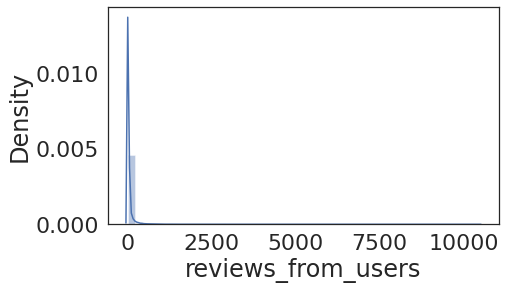

In [111]:
fig, ax = plt.subplots(figsize=(7, 4))  ## Visualizing reviews_from_users wuth a histogram to choose the method for its missing values imputation
sns.distplot(movies.reviews_from_users)

In [112]:
movies['reviews_from_users'] = movies['reviews_from_users'].fillna(movies['reviews_from_users'].mode()[0])  ## chose mode bacause the data imbalance is high

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



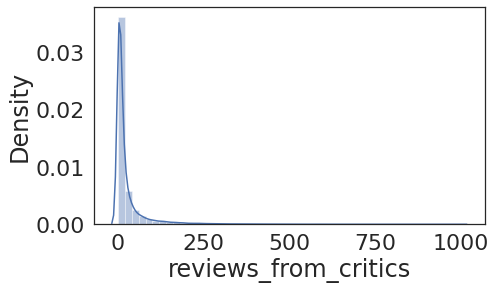

In [113]:
fig, ax = plt.subplots(figsize=(7, 4))  ## Visualizing reviews_from_critics wuth a histogram to choose the method for its missing values imputation
sns.distplot(movies.reviews_from_critics)

In [114]:
movies['reviews_from_critics'] = movies['reviews_from_critics'].fillna(movies['reviews_from_critics'].mode()[0]) ## chose mode bacause the data imbalance is high

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



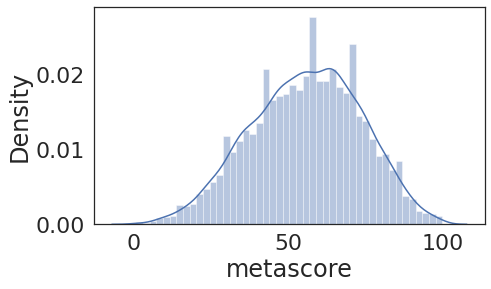

In [115]:
fig, ax = plt.subplots(figsize=(7, 4))  ## Visualizing reviews_from_critics wuth a histogram to choose the method for its missing values imputation
sns.distplot(movies.metascore)

In [116]:
movies['metascore'] = movies['metascore'].fillna(movies['metascore'].median()) ## Choosing median since the data is a little left skewed but almost a normal distribution

In [117]:
movies.isnull().sum()

imdb_title_id              0
title                      0
year                       0
date_published             0
genre                      0
duration                   0
country                    0
language                   0
director                   0
writer                     0
production_company         0
actors                     0
description             2115
avg_vote                   0
votes                      0
metascore                  0
reviews_from_users         0
reviews_from_critics       0
dtype: int64

In [118]:
movies = movies.replace(r'^s*$', float('NaN'), regex = True) ## replacing the blank values in 'description' column with NaN values to drop them using the next command

In [119]:
movies.dropna(inplace=True) ## drop the NaN values in 'description' column

In [120]:
movies.isnull().sum()

imdb_title_id           0
title                   0
year                    0
date_published          0
genre                   0
duration                0
country                 0
language                0
director                0
writer                  0
production_company      0
actors                  0
description             0
avg_vote                0
votes                   0
metascore               0
reviews_from_users      0
reviews_from_critics    0
dtype: int64

Now, we have imputed/removed all the missing values from the dataset.

**Exploratory Data Analysis**

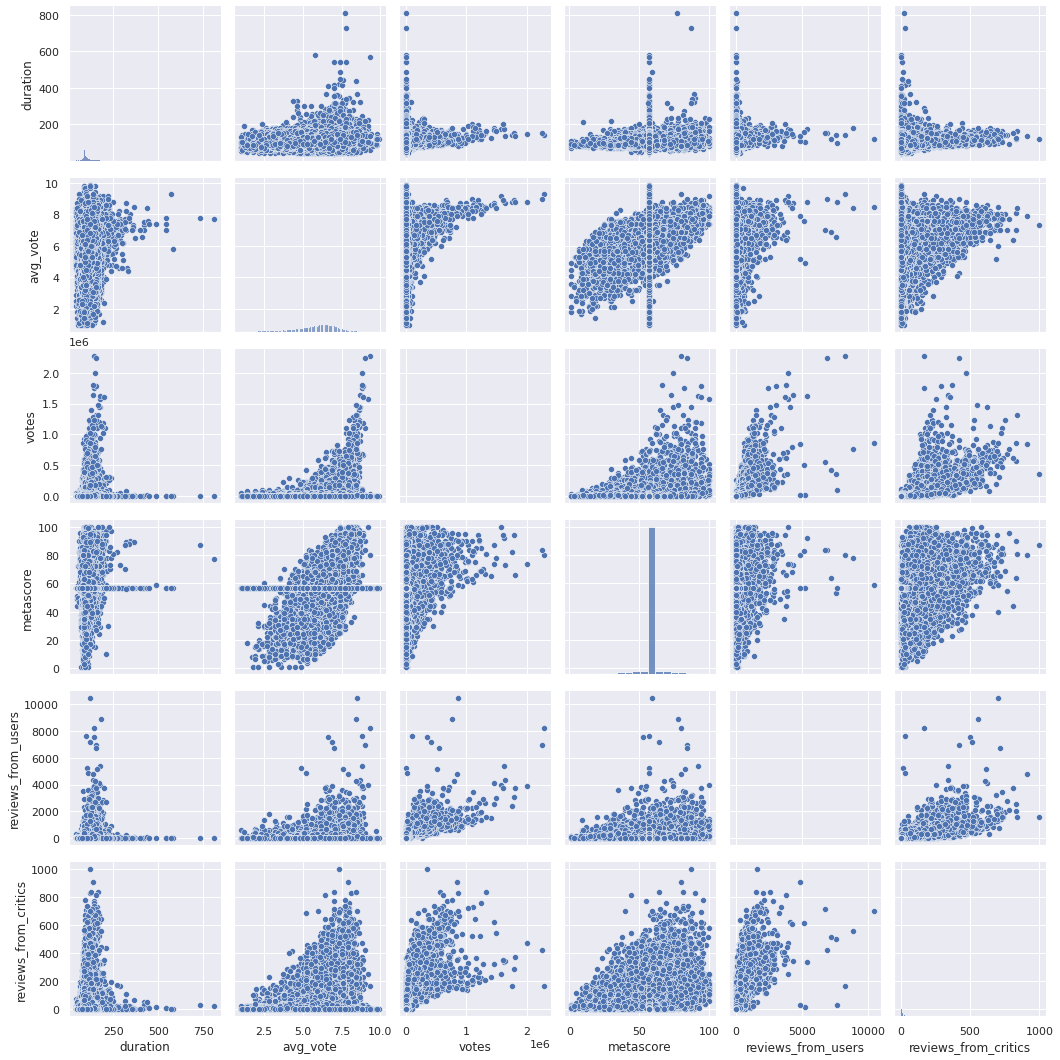

In [121]:
#scatterplot
sns.set()
cols = ['duration', 'avg_vote', 'votes', 'metascore', 'reviews_from_users', 'reviews_from_critics']
sns.pairplot(movies[cols], height = 2.5)
plt.show();

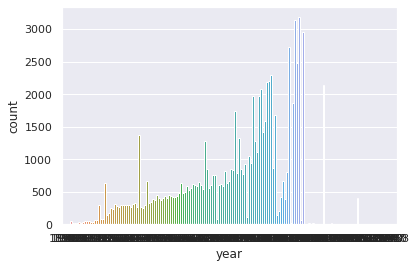

In [122]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="year", data=movies)

As we can see above, although the years aren't clearly visible but there are years when more than 3000 movies have been launched worldwide and some years where negligible amount of movies have been released. We can say that with time, there has been an evolution in the movie industry.

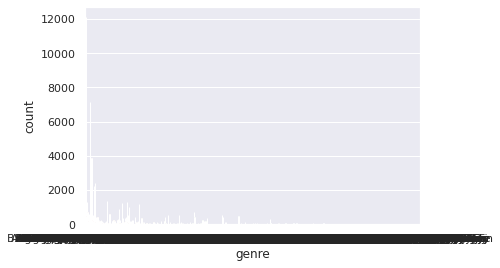

In [123]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="genre", data=movies)

All about duration

In [124]:
movies[movies['duration']==movies['duration'].min()][['title','duration','year']]

,title,duration,year
32798,Dragon Ball Z: La vendetta divina,41,1989


In [125]:
movies[movies['duration']==movies['duration'].max()][['title','duration','year']]

,title,duration,year
85057,La flor,808,2016


All the short movies list i.e longer than 30 minutes and shorter than 60 minutes

In [126]:
short_movie=movies[(movies['duration']>=30) & (movies['duration']<=60) ].sort_values('duration')

In [127]:
short_movie[['title', 'year', 'duration']]

,title,year,duration
32798,Dragon Ball Z: La vendetta divina,1989,41
57390,Enigma,2009,42
3966,Niagara Falls,1941,43
54562,My Little Pony: Equestria Girls - Holidays Unw...,2019,44
73689,Slam Dunk: Zenkoku Seiha da! Sakuragi Hanamichi,1994,45
...,...,...,...
6965,Overland Telegraph,1951,60
6998,Saddle Legion,1951,60
2677,Il tesoro del dirigibile,1937,60
64556,New Prime,2011,60


Does duration more than 100 and less than 100 have any relation in ratings?

In [128]:
print('More than 100 duration > avg vote:',movies[movies['duration'] >=100]['avg_vote'].sum().round(2))
print('Less than 100 duration > avg vote:',movies[movies['duration'] < 100]['avg_vote'].sum().round(2))

More than 100 duration > avg vote: 220949.6
Less than 100 duration > avg vote: 273563.1


Movie Sets with all movies rated greater than 8.5 and having more than 500000 votes

In [129]:
movie_highest=movies[(movies['avg_vote']>8.5) & (movies['votes'] > 500000)]

In [130]:
movie_highest.shape

(27, 18)

In [131]:
movie_highest[['title','year','avg_vote','votes']]

,title,year,avg_vote,votes
8973,La parola ai giurati,1957,8.9,668473
12567,"Il buono, il brutto, il cattivo",1966,8.8,672499
15528,Il padrino,1972,9.2,1572674
16556,Il padrino - Parte II,1974,9.0,1098714
17147,Qualcuno volò sul nido del cuculo,1975,8.7,891071
18216,Guerre stellari,1977,8.6,1204107
19394,L'Impero colpisce ancora,1980,8.7,1132073
25300,Quei bravi ragazzi,1990,8.7,991505
26257,Il silenzio degli innocenti,1991,8.6,1234134
27629,Schindler's List,1993,8.9,1183248


So, there are 27 movies which have average vote greater than 8.5 and votes higher than 500000.

Top 3 country movie producing

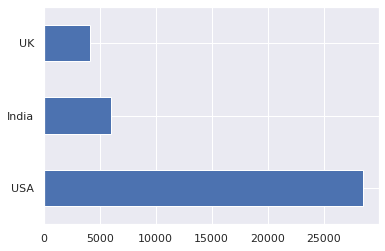

In [132]:
movies['country'].value_counts()[:3].plot(kind='barh')

Creating a new column called My_rating

In [133]:
def my_rating(rating):
    if rating >=7:
        return "BlockBuster"
    elif rating >= 5:
        return "Average"
    else:
        return "Flop"
movies['my_rating']=movies['avg_vote'].apply(my_rating)
movies[['title','genre','duration','year','avg_vote','votes','my_rating']]

,title,genre,duration,year,avg_vote,votes,my_rating
0,Miss Jerry,Romance,45,1894,5.9,154,Average
1,The Story of the Kelly Gang,"Biography, Crime, Drama",70,1906,6.1,589,Average
2,Den sorte drøm,Drama,53,1911,5.8,188,Average
3,Cleopatra,"Drama, History",100,1912,5.2,446,Average
4,L'Inferno,"Adventure, Drama, Fantasy",68,1911,7.0,2237,BlockBuster
...,...,...,...,...,...,...,...
85848,Pengalila,Drama,111,2019,8.8,553,BlockBuster
85849,Manoharam,"Comedy, Drama",122,2019,6.8,491,Average
85850,Le lion,Comedy,95,2020,5.3,398,Average
85851,De Beentjes van Sint-Hildegard,"Comedy, Drama",103,2020,7.7,724,BlockBuster


In [134]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83740 entries, 0 to 85854
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_title_id         83740 non-null  object 
 1   title                 83740 non-null  object 
 2   year                  83740 non-null  object 
 3   date_published        83740 non-null  object 
 4   genre                 83740 non-null  object 
 5   duration              83740 non-null  int64  
 6   country               83740 non-null  object 
 7   language              83740 non-null  object 
 8   director              83740 non-null  object 
 9   writer                83740 non-null  object 
 10  production_company    83740 non-null  object 
 11  actors                83740 non-null  object 
 12  description           83740 non-null  object 
 13  avg_vote              83740 non-null  float64
 14  votes                 83740 non-null  int64  
 15  metascore          

In [135]:
movies1 = movies.drop(['imdb_title_id','title', 'year', 'date_published', 'genre', 'country', 'language', 'director', 'writer', 'production_company', 'actors', 'description', 'my_rating'], axis=1)

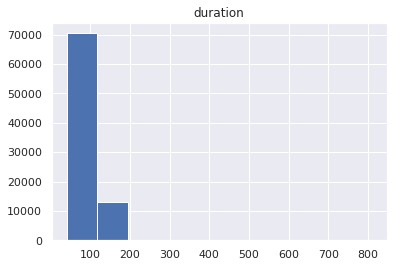

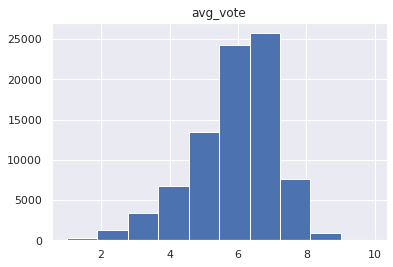

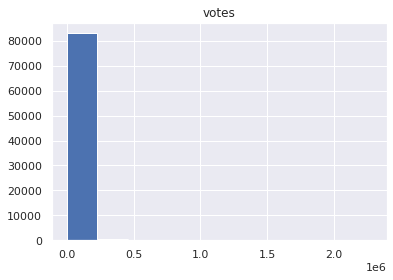

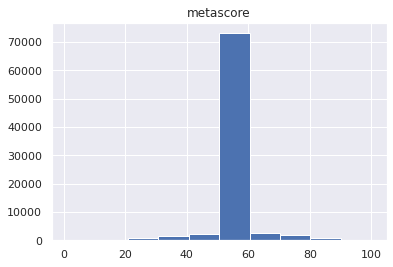

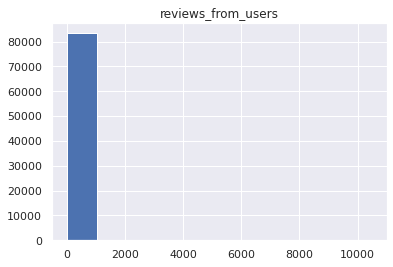

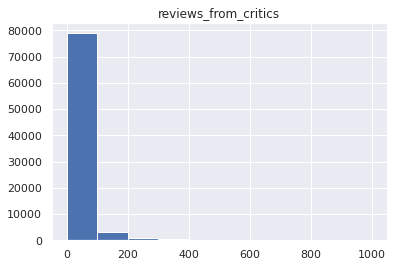

In [136]:
for i in movies1.columns:   
        movies1.hist(i)

In [137]:
# Set Background
sns.set(style = 'white', font_scale =2)
# Compute the matrix
corr = movies1.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

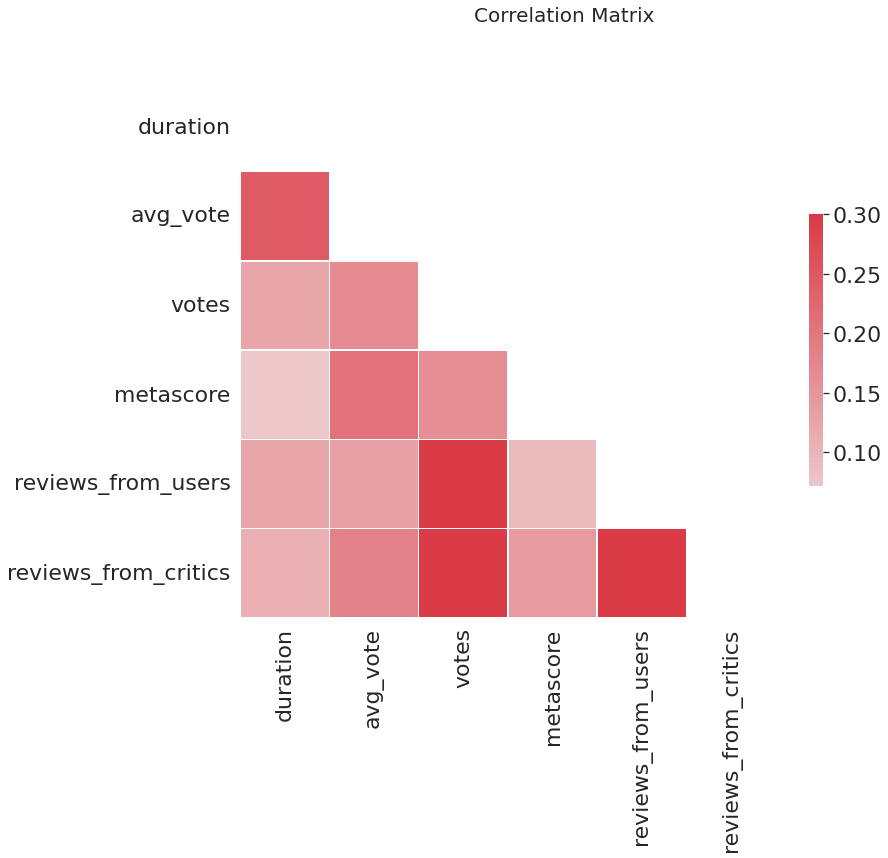

In [138]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
f.suptitle("Correlation Matrix", fontsize = 20)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [139]:
#correlation
correlation = movies1.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
correlation

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
duration,1.000000,0.246246,0.125768,0.071797,0.123800,0.108680
avg_vote,0.246246,1.000000,0.168301,0.207041,0.133407,0.181080
votes,0.125768,0.168301,1.000000,0.160867,0.766564,0.671849
metascore,0.071797,0.207041,0.160867,1.000000,0.089964,0.145131
reviews_from_users,0.123800,0.133407,0.766564,0.089964,1.000000,0.675263
reviews_from_critics,0.108680,0.181080,0.671849,0.145131,0.675263,1.000000


In [140]:
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [141]:
movies.dtypes

imdb_title_id            object
title                    object
year                     object
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
writer                   object
production_company       object
actors                   object
description              object
avg_vote                float64
votes                     int64
metascore               float64
reviews_from_users      float64
reviews_from_critics    float64
my_rating                object
dtype: object

**Label Encoding the target variable**

In [142]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
movies['my_rating']= label_encoder.fit_transform(movies['my_rating'])
 
movies['my_rating'].unique()

array([0, 1, 2])

In [143]:
movies_2 = movies.copy()

In [144]:
X = movies_2.drop(['title', 'year', 'date_published', 'genre', 'country', 'language', 'director', 'writer', 'production_company', 'actors', 'description', 'my_rating'], axis=1)

In [145]:
y = movies_2['my_rating']

In [146]:
# Import the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [147]:
# Keep user ID for associating the user ID to its prediction (Save before you remove it)
train_ID = X_train['imdb_title_id']

In [148]:
train_ID.head()

42448    tt0333526
69729    tt3078296
62053    tt1797487
46904    tt0442399
33171    tt0150790
Name: imdb_title_id, dtype: object

In [149]:
# Drop it from the train set
X_train = X_train.drop(columns = 'imdb_title_id')

In [150]:
# Keep user ID for associating the user ID to its prediction from the test set
test_ID = X_test['imdb_title_id']

In [151]:
test_ID.head()

3143     tt0030884
28341    tt0110803
48529    tt0478165
4497     tt0035979
7500     tt0045589
Name: imdb_title_id, dtype: object

In [152]:
# Drop it from the test set
X_test = X_test.drop(columns = 'imdb_title_id')

In [153]:
# import standard scalar function 
from sklearn.preprocessing import StandardScaler

In [154]:
sc_X = StandardScaler() # returns numpy array but looses the column names and index

In [155]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [156]:
sc_X.mean_

array([1.00458846e+02, 5.90493193e+00, 9.69282655e+03, 5.68271137e+01,
       4.30883837e+01, 2.43447427e+01])

In [157]:
sc_X.scale_

array([2.27334106e+01, 1.23328223e+00, 5.42795421e+04, 7.09102427e+00,
       1.75766540e+02, 5.55315209e+01])

# Model Building 

**Logistic Regression**

In [158]:
# import the appropriate model we will use LogisticRegression
from sklearn.linear_model import LogisticRegression

In [159]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train2,y_train)

LogisticRegression(random_state=0)

In [160]:
# Predicting the test set
y_pred = classifier.predict(X_test2)

In [161]:
classifier.coef_

array([[-1.29806076e-02, -3.61957953e+00, -2.04802202e-02,
         2.09985044e-04,  3.37851305e-02, -3.12941447e-02],
       [ 2.21711472e-02,  3.50852489e+01, -1.18845822e-02,
         1.49466316e-03, -6.91186369e-04,  1.15593641e-02],
       [-9.19053960e-03, -3.14656694e+01,  3.23648024e-02,
        -1.70464821e-03, -3.30939441e-02,  1.97347807e-02]])

In [162]:
# Evaluating the results and validate accuracy
# Buld the Confusion Matrix by importing the correct libraries
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score,precision_score,recall_score

cm = confusion_matrix(y_test, y_pred)

Test Data Accuracy: 0.9999


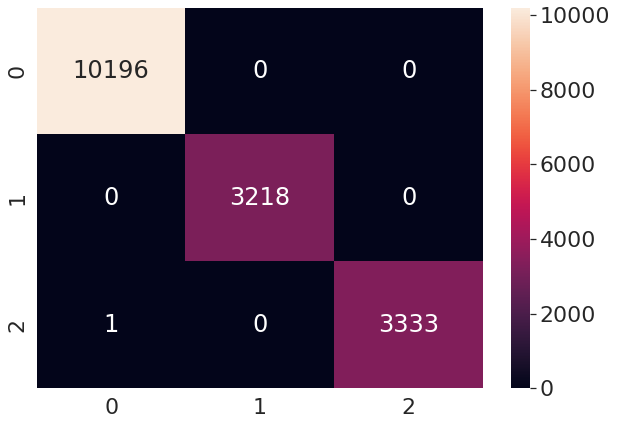

In [163]:
# Create a Comfusion matrix visually
X_cm = pd.DataFrame(cm, index = (0, 1, 2), columns = (0, 1, 2))
plt.figure(figsize = (10, 7))
sns.heatmap(X_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))

In [164]:
# Print the accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted', zero_division=1))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9999402913780749
0.9999402972335837
0.9999402913780749
0.9999402883641012


Since the dataset was scaled using standard scaler, we can consider accuracy score (61%) which is not a bad score and can be improved further if we had more variables which made sense in the dataset.

# Model Conclusion

In [165]:
# Formatting the final results
final_results = pd.concat([y_test, test_ID], axis =1).dropna()

In [166]:
final_results['predicted_results'] = y_pred

In [167]:
# Reorder the columns so the final results look like this
final_results = final_results[['imdb_title_id', 'my_rating', 'predicted_results']].reset_index(drop = True)
print(final_results)

      imdb_title_id  my_rating  predicted_results
0         tt0030884          0                  0
1         tt0110803          0                  0
2         tt0478165          2                  2
3         tt0035979          1                  1
4         tt0045589          0                  0
...             ...        ...                ...
16743     tt0040087          1                  1
16744     tt0066550          0                  0
16745     tt0466449          0                  0
16746     tt0469263          0                  0
16747     tt0449228          0                  0

[16748 rows x 3 columns]


Finally, we can see that the model is predicting the results with 61% accuracy on the test set as is evident in the table above.

**Random Forest**

Test Data Accuracy: 0.5939 Test Data F1 Score: 0.4774
Accuracy Score: 0.5938619536661094
Precision Score: 0.4587123315948206
Recall Score: 0.5938619536661094
F1 Score: 0.4774185118155445


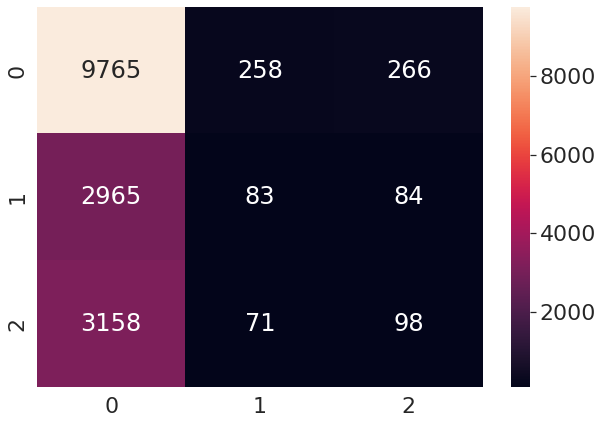

In [174]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 424)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators=100)
classifier1.fit(X_train2, y_train)  

# Predicting the Test set results 
y_pred = classifier1.predict(X_test2)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1, 2), columns = (0, 1, 2))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred), "Test Data F1 Score: %.4f" %f1_score(y_test,y_pred, average='weighted'))

# Evaluate the results
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred, average='weighted'))
print('Recall Score:',recall_score(y_test,y_pred, average='weighted'))
print('F1 Score:',f1_score(y_test,y_pred, average='weighted'))

**Decision Tree Classifier**

Test Data Accuracy: 0.4370 Test Data F1 Score: 0.4411
Accuracy Score: 0.4370074038691187
Precision Score: 0.4455184958283181
Recall Score: 0.4370074038691187
F1 Score: 0.4411031561462954


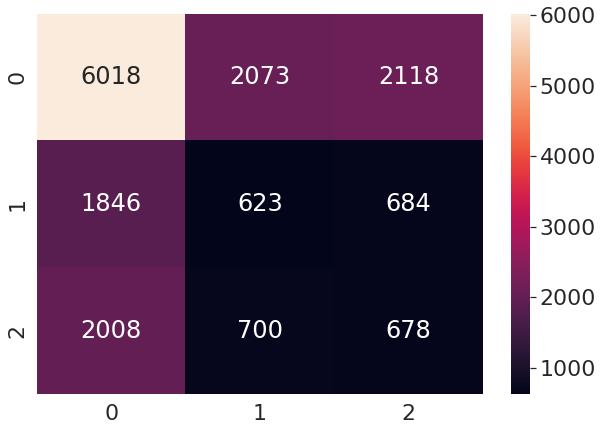

In [178]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 426)


# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier 
cf_dt1 = DecisionTreeClassifier()
cf_dt1.fit(X_train2, y_train)


# Predicting the Test set results 
y_pred = cf_dt1.predict(X_test2)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1, 2), columns = (0, 1, 2))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred), "Test Data F1 Score: %.4f" %f1_score(y_test,y_pred,average='weighted'))

# Evaluate the results
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='weighted'))
print('Recall Score:',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))

**Support Vector Machine**

Test Data Accuracy: 0.6102 Test Data F1 Score: 0.4625
Accuracy Score: 0.610222116073561
Precision Score: 0.37237103094529456
Recall Score: 0.610222116073561
F1 Score: 0.46250890138473705


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



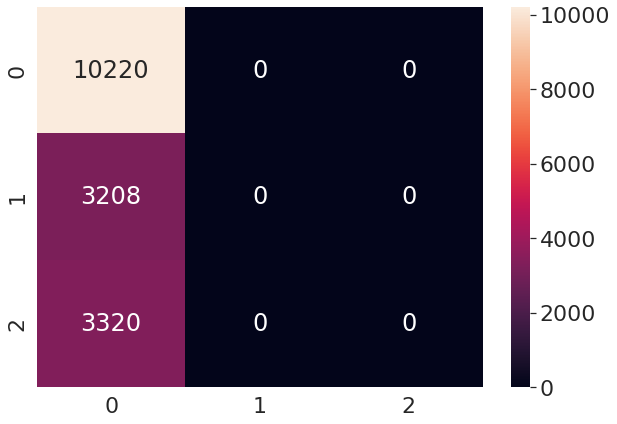

In [179]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 503)


# Fitting classifier to the Training set
from sklearn.svm import SVC
cf_svc1 = SVC(kernel='linear', random_state=0)
cf_svc1.fit(X_train2, y_train)


# Predicting the Test set results 
y_pred = cf_svc1.predict(X_test2)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1, 2), columns = (0, 1, 2))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred), "Test Data F1 Score: %.4f" %f1_score(y_test,y_pred,average='weighted'))

# Evaluate the results
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='weighted'))
print('Recall Score:',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))

Final Results Summary for all the above models: 

| Model | Accuracy_score | Precision | Recall | F1 |
| --- | --- | --- | --- | --- |
| Logistic Regression	 | 99% | 99% | 99% | 99% |
| Random Forest		 | 59% | 45% | 59%|48%| 
| Decision Tree	 | 44% | 45% |44%|44%|
| Support Vector Machine (SVM)		 | 61% | 37% |61%|46%|



Hence, the best model is Logistic Regression with 99% accuracy and F1 score.